In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
salary = pd.read_csv('salaries version 1.6 - after data preprocessing.csv')

In [3]:
salary.head()

,age,industry,job title,annual salary,bonus,country,years of experience,field years of experience,highest level of education,gender
0,2,Education (Higher Education),Research and Instruction Librarian,55000.0,0.0,USA,2,2,4.0,Woman
1,2,Computing or Tech,Change & Internal Communications Manager,67704.0,4960.0,GBR,3,2,3.0,Prefer not to answer
2,2,"Accounting, Banking & Finance",Marketing Specialist,34000.0,0.0,USA,1,1,3.0,Woman
3,2,Nonprofits,Program Manager,62000.0,3000.0,USA,3,2,3.0,Woman
4,2,"Accounting, Banking & Finance",Accounting Manager,60000.0,7000.0,USA,3,2,3.0,Woman


What is the average age of respondents in the dataset?

In [4]:
salary['age'].mean()

2.6397834255929533

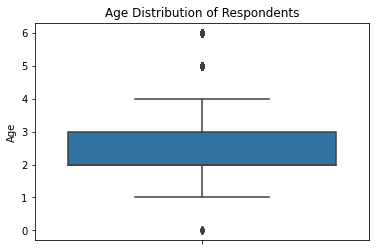

The average age of respondents is 2.64.


In [5]:
#What is the average age of respondents in the dataset?
mean_age = salary['age'].mean()
sns.boxplot(data=salary, y='age')
plt.ylabel('Age')
plt.title('Age Distribution of Respondents')
plt.show()

# Print the average age
print(f"The average age of respondents is {mean_age:.2f}.")

2.What is the most common industry among respondents?

In [6]:
salary['industry'].count()

24749

In [7]:
salary['industry'].value_counts().idxmax()

'Computing or Tech'

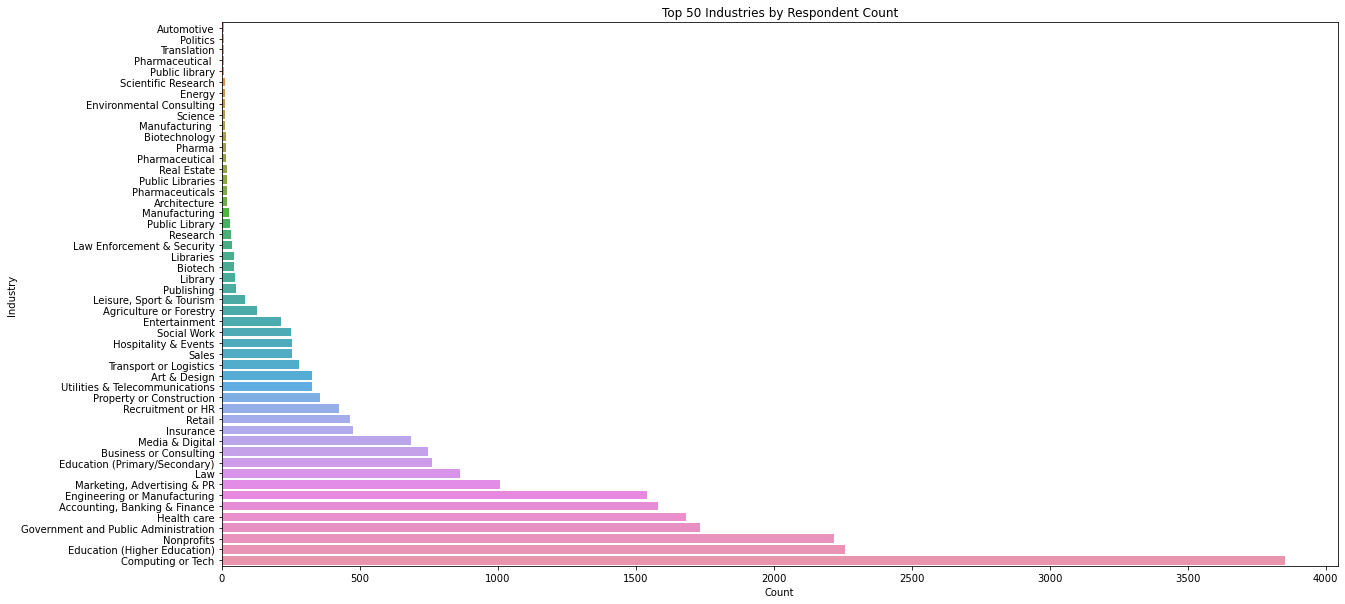

In [8]:
#2.What is the most common industry among respondents?
industry_counts = salary['industry'].value_counts()


# Get the top 50 industries in ascending order
top_50_industries = industry_counts.head(50).sort_values()
plt.figure(figsize=(20, 10))  # Set the size of the plot

# Plot the count of respondents for the top 50 industries using seaborn
sns.barplot(x=top_50_industries.values, y=top_50_industries.index)
plt.xlabel('Count')
plt.ylabel('Industry')
plt.title('Top 50 Industries by Respondent Count')
plt.show()


3. What is the most common job title among respondents?


In [12]:
most_common_job_title = salary['job title'].value_counts().idxmax()

# Count the number of respondents for each job title
counts_by_job_title = salary['job title'].value_counts()

# Take the top 50 job titles and rank them in ascending order
top_50_job_titles = counts_by_job_title.head(50).sort_values(ascending=True)

# Print the most common job title
print("The most common job title among respondents is:", most_common_job_title)

# Print the top 50 job titles ranked in ascending order
print("Top 50 job titles in ascending order:")
print(top_50_job_titles)

The most common job title among respondents is: Software Engineer
Top 50 job titles in ascending order:
Technical Writer             36
RN                           38
Registered Nurse             38
Controller                   38
Vice President               38
Senior Consultant            38
Accounting Manager           39
Director of Operations       39
Senior Project Manager       39
Associate Professor          39
Software engineer            40
Project Coordinator          43
Graphic Designer             43
HR Generalist                44
Senior Analyst               44
Program Coordinator          46
Senior Manager               46
Executive Assistant          46
Assistant Director           47
Associate Attorney           47
Data Scientist               53
Engineering Manager          53
Associate Director           54
Account Manager              55
Consultant                   60
Executive Director           61
Associate                    65
Assistant Professor          67


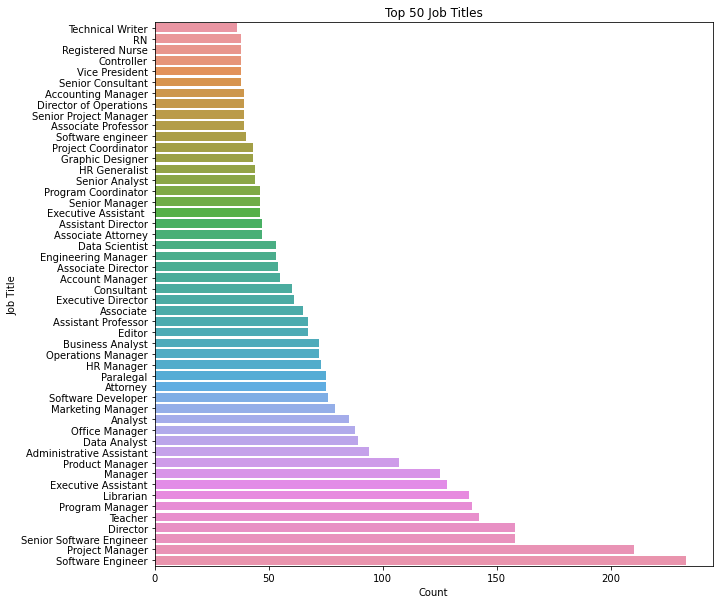

In [13]:
plt.figure(figsize=(10, 10))
# Visualize the top 50 job titles
sns.barplot(x=top_50_job_titles.values, y=top_50_job_titles.index)
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Top 50 Job Titles')
plt.show()

4. What percentage of respondents reported receiving additional monetary compensation beyond their salary?

In [18]:
num_additional_compensation = salary['bonus'].count()>0

# calculate the percentage of respondents who received additional compensation
percent_additional_compensation = (num_additional_compensation / len(salary)) * 100
print(percent_additional_compensation)

0.004040567295648309


5. What is the average annual salary among respondents?


In [14]:
# calculate the average annual salary
average_salary = salary['annual salary'].mean()

print(f"The average annual salary is {average_salary }")


The average annual salary is 79518.57487534852


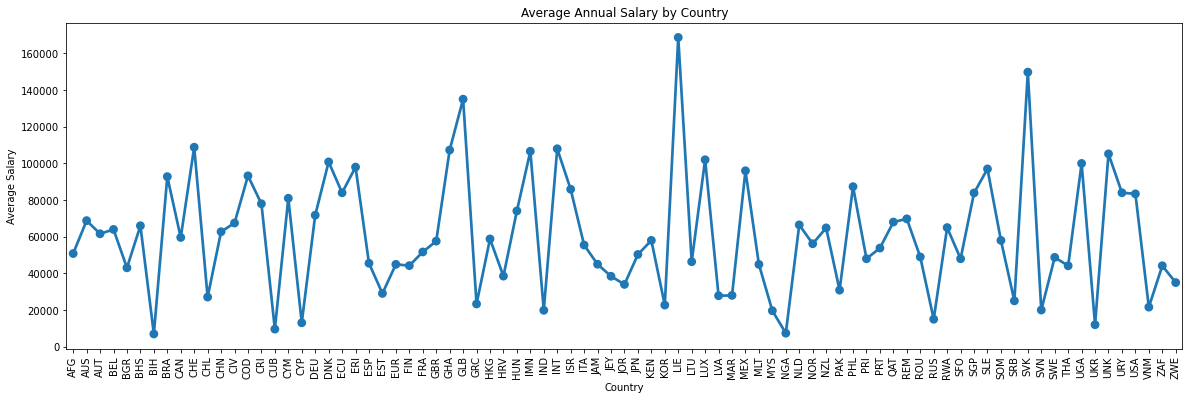

In [15]:
grouped = salary.groupby('country')['annual salary'].mean()

grouped_df = grouped.reset_index()

# Create a point plot
plt.figure(figsize=(20, 6))  # Set the size of the plot
sns.pointplot(data=grouped_df, x='country', y='annual salary')
plt.title('Average Annual Salary by Country')
plt.xlabel('Country')
plt.ylabel('Average Salary')

plt.xticks(rotation=90)
plt.show()

6. What is the average income of respondents broken down by country?


In [16]:
# group the data by country and calculate the average income for each group
grouped = salary.groupby('country')['annual salary'].mean()

# print the result
print(grouped)

country
AFG    50840.000000
AUS    68793.449592
AUT    61625.705882
BEL    63990.306452
BGR    43067.500000
           ...     
URY    84000.000000
USA    83404.591044
VNM    21600.000000
ZAF    44181.150000
ZWE    35000.000000
Name: annual salary, Length: 83, dtype: float64


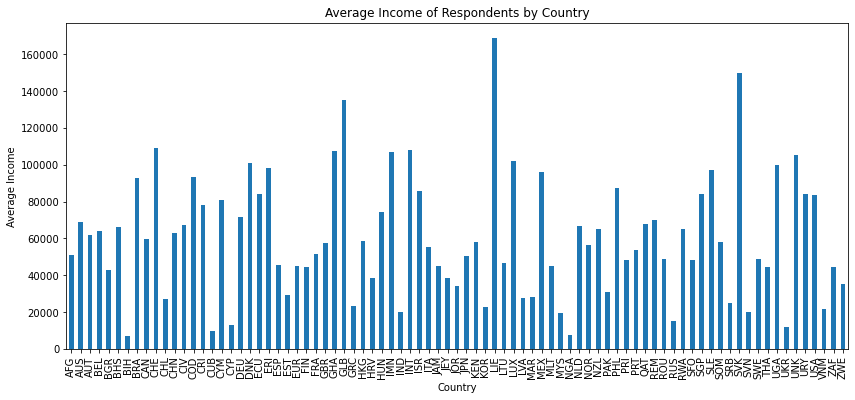

In [17]:
plt.figure(figsize=(14, 6))
grouped.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Average Income')
plt.title('Average Income of Respondents by Country')
plt.show()

7. What is the average income of respondents broken down by gender and race?

In [21]:
# group the data by both gender and race and calculate the average income for each group
grouped = salary.groupby(['gender'])['annual salary'].mean()

# print the result
print(grouped)
 

gender
Man                     91971.342153
Prefer not to answer    70482.632429
Woman                   77026.066464
Name: annual salary, dtype: float64


9. How much more do respondents with a graduate degree earn compared to those with only a bachelor's degree?

In [39]:
# count the number of occurrences of each education level
education_counts = salary['highest level of education'].value_counts()

# find the most common education level
most_common_education = education_counts.index[0]

# print the result
print(f"The most common highest level of education among respondents is {most_common_education}.")

The most common highest level of education among respondents is 3.0.


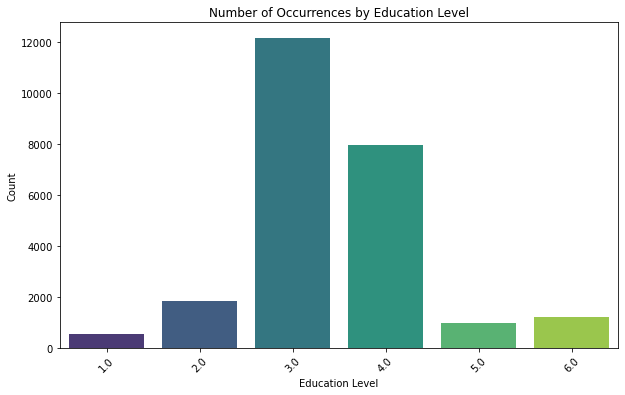

In [40]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=education_counts.index, y=education_counts.values, palette="viridis")

# Customize the plot
plt.title("Number of Occurrences by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Display the plot
plt.show()

10. What is the average number of years of experience among respondents?


In [24]:
# calculate the average years of experience
average_experience = salary['years of experience'].mean()

# print the result
print(f"The average number of years of experience among respondents is {average_experience:.2f}.")

The average number of years of experience among respondents is 3.24.


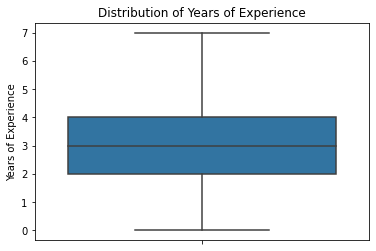

In [25]:
sns.boxplot(data=salary, y='years of experience')
plt.ylabel('Years of Experience')
plt.title('Distribution of Years of Experience')
plt.show()

11. What is the most common field of experience among respondents?

In [24]:
# calculate the average years of experience
average_experience = salary['field years of experience'].mean()

# print the result
print(f"The average number of years of experience among respondents is {average_experience:.2f}.")

The average number of years of experience among respondents is 2.54.


The most common field of experience among respondents is: 2


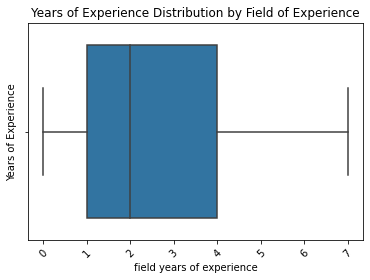

In [26]:
# Count the number of respondents in each field of experience
counts_by_field = salary['field years of experience'].value_counts()

# Find the most common field of experience
most_common_field = counts_by_field.idxmax()

# Print the most common field of experience
print("The most common field of experience among respondents is:", most_common_field)

# Create a boxplot for the 'field of experience' column
sns.boxplot(data=salary, x='field years of experience')
plt.xlabel('field years of experience')
plt.ylabel('Years of Experience')
plt.title('Years of Experience Distribution by Field of Experience')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

13. How does the income of respondents with years of experience	 compare to those without years of experience in each industry?

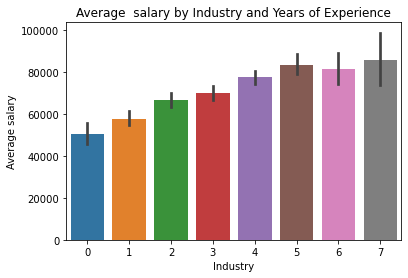

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
# group the data by both industry and years_of_experience and calculate the average income for each group
grouped = salary.groupby(['industry', 'years of experience'])['annual salary'].mean().reset_index()

# create a pivot table to reshape the data
pivot = grouped.pivot(index='industry', columns='years of experience', values='annual salary')

# create a bar chart to visualize the data
sns.barplot(data=pivot)

# set the title and axis labels
plt.title('Average  salary by Industry and Years of Experience')
plt.xlabel('Industry')
plt.ylabel('Average salary')

# show the plot
plt.show()

14. How does the income of respondents with difference   level of education  in each industry?
 

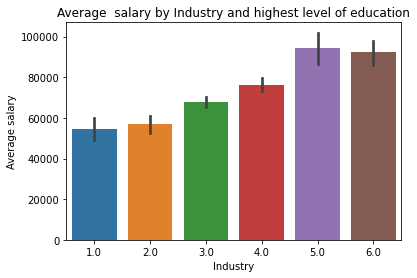

In [26]:
# group the data by both industry and years_of_experience and calculate the average income for each group
grouped = salary.groupby(['industry', 'highest level of education'])['annual salary'].mean().reset_index()

# create a pivot table to reshape the data
pivot = grouped.pivot(index='industry', columns='highest level of education', values='annual salary')

# create a bar chart to visualize the data
sns.barplot(data=pivot)

# set the title and axis labels
plt.title('Average  salary by Industry and highest level of education')
plt.xlabel('Industry')
plt.ylabel('Average salary')

# show the plot
plt.show()



 15. What is the minimum and maximum income reported inthe dataset?

In [32]:
# find the minimum and maximum incomes
min_income = salary['annual salary'].min()
max_income = salary['annual salary'].max()

# print the results
print("Minimum income reported: $", min_income)
print("Maximum income reported: $", max_income)


Minimum income reported: $ 1.0
Maximum income reported: $ 185000.0


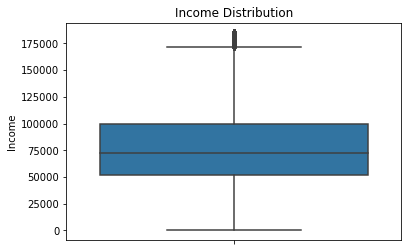

In [33]:

# Create a box plot for the income data
sns.boxplot(data=salary, y='annual salary')
plt.ylabel('Income')
plt.title('Income Distribution')
plt.show()

16. What is the average income of respondents broken down by job title?

In [34]:
# group the data by job title and calculate the average income for each group
avg_income_by_job_title = salary.groupby('job title')['annual salary'].mean()

# print the result
print(avg_income_by_job_title)

job title
 Analyst                     65300.0
 Brand Manager               78750.0
 Business Systems Analyst    59000.0
 CAP team                    34320.0
 CNA                         33280.0
                              ...   
web developer                52500.0
workers comp case manager    50000.0
writer                       33500.0
writer/editor                43500.0
yard control                 33000.0
Name: annual salary, Length: 13050, dtype: float64


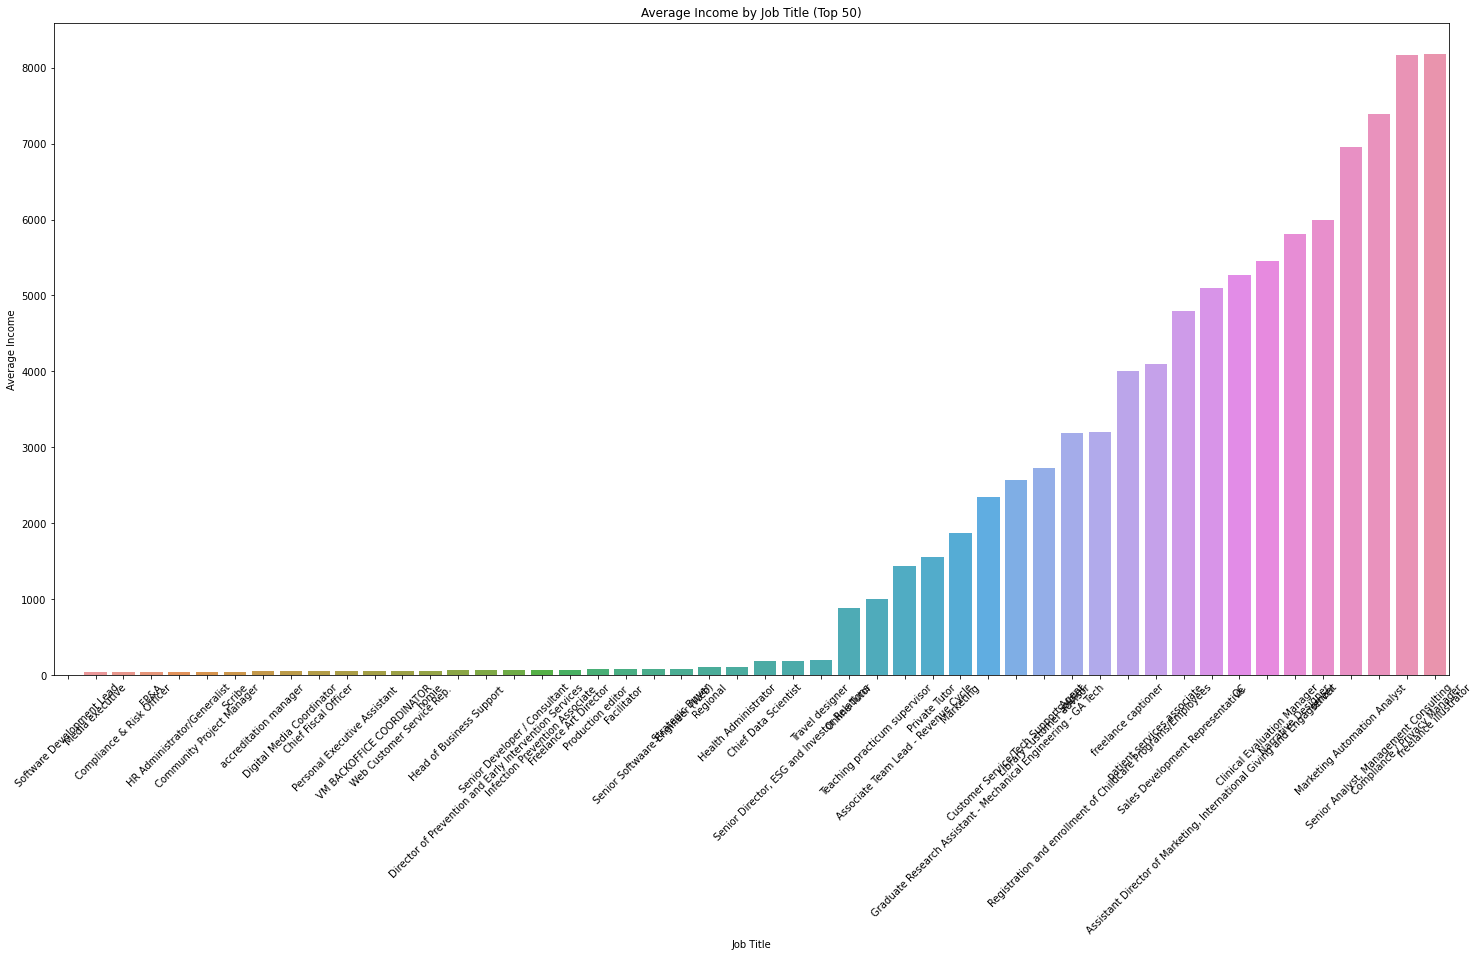

In [35]:
# Plotting the data using seaborn
plt.figure(figsize=(25, 12))  # Set the figure size


# Sort the average incomes in ascending order and select the top 50 job titles
top_50_job_titles = avg_income_by_job_title.sort_values().head(50)

# Create a bar plot for the average income by job title
sns.barplot(x=top_50_job_titles.index, y=top_50_job_titles.values)
plt.xlabel('Job Title')
plt.ylabel('Average Income')
plt.title('Average Income by Job Title (Top 50)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

17. How does the income of respondents vary based on their age?

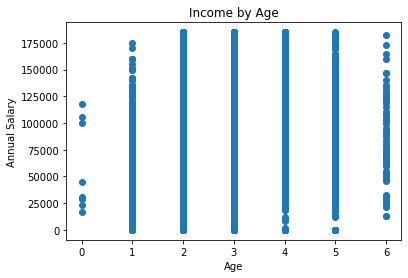

In [30]:
# create a scatter plot to examine how income varies with age
plt.scatter(salary['age'], salary['annual salary'])

# set the title and axis labels
plt.title('Income by Age')
plt.xlabel('Age')
plt.ylabel('Annual Salary')

# show the plot
plt.show()

18. What is the most common age range among respondents?

In [28]:
# create age ranges using pandas' cut() function
age_ranges = pd.cut(salary['age'], bins=[0, 1, 2, 3, 4, 5, 6, 7])

# count the number of respondents in each age range
counts_by_age_range = age_ranges.value_counts()

# find the most common age range
most_common_age_range = counts_by_age_range.idxmax()

# print the result
print("The most common age range among respondents is:", most_common_age_range)

The most common age range among respondents is: (1, 2]


TypeError: '<' not supported between instances of 'pandas._libs.interval.Interval' and 'numpy.float64'

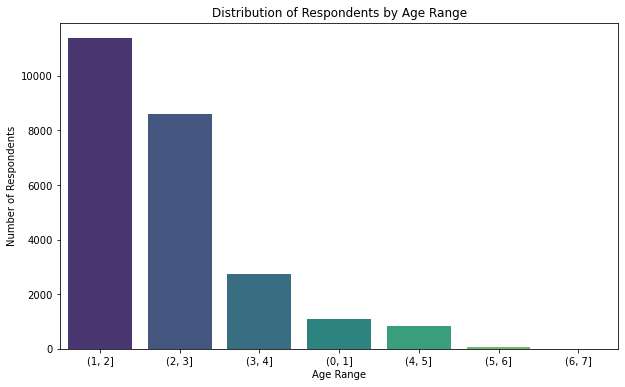

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x=counts_by_age_range.index.astype(str), y=counts_by_age_range.values, palette="viridis")

plt.xlabel('Age Range')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Respondents by Age Range')

plt.axvline(x=most_common_age_range, color='red', linestyle='--', label='Most Common Age Range')

plt.legend()

plt.show()

19. What is the number of respondents from each country?

In [30]:
# count the number of respondents from each country
counts_by_country = salary['country'].value_counts()

# find the most common country
most_common_country = counts_by_country.idxmax()

# print the result
print("The most common country among respondents is:", most_common_country)

The most common country among respondents is: USA


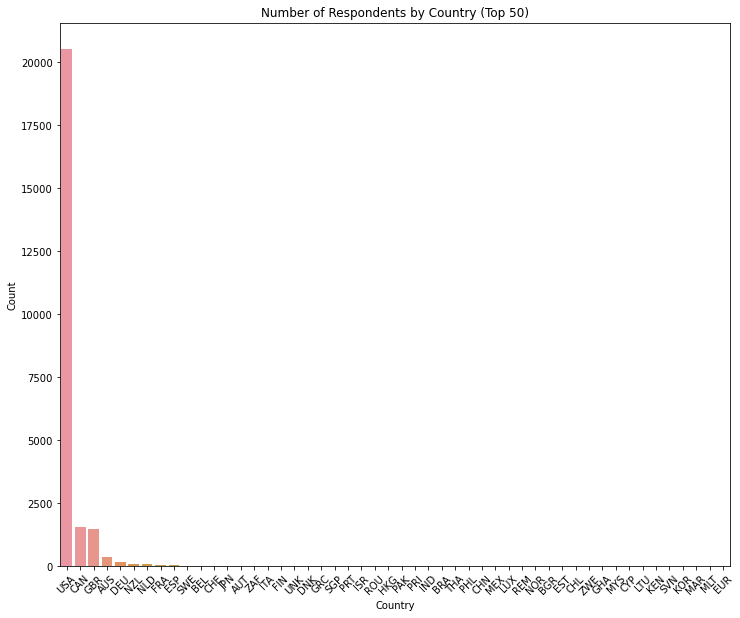

In [31]:
plt.figure(figsize=(12, 10))
# Take the first 50 countries in ascending order
top_50_countries = counts_by_country.head(50)

# Plot the count of respondents for the top 50 countries using seaborn
sns.barplot(x=top_50_countries.index, y=top_50_countries.values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Number of Respondents by Country (Top 50)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


20. What is the most common field of experience among respondents broken down by gender?

In [21]:
# group the data by gender and field of experience
grouped_data = salary.groupby(['gender', 'field years of experience'])

# count the number of respondents in each group
counts_by_group = grouped_data.size()

# find the most common field of experience for each gender
most_common_by_gender = counts_by_group.groupby(level=0).idxmax()

# print the result
print("The most common field of experience by gender is:\n", most_common_by_gender)

The most common field of experience by gender is:
 gender
Man                                      (Man, 4)
Prefer not to answer    (Prefer not to answer, 1)
Woman                                  (Woman, 2)
dtype: object


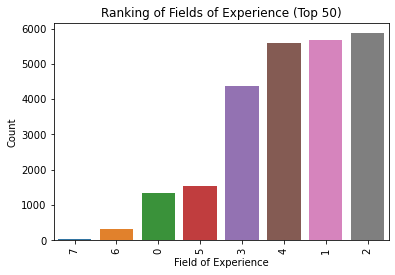

In [23]:
# Rank the fields of experience in ascending order for the first 50 on the x-axis
ranked_fields = counts_by_group.groupby(level=1).sum().sort_values(ascending=True).index[:50]

# Create a bar plot to visualize the rankings
sns.countplot(data=salary[salary['field years of experience'].isin(ranked_fields)], x='field years of experience', order=ranked_fields)
plt.xlabel('Field of Experience')
plt.ylabel('Count')
plt.title('Ranking of Fields of Experience (Top 50)')
plt.xticks(rotation=90)
plt.show()

21. How does the income of male and female respondents compare across different industries?

In [19]:
# create a pivot table with gender and industry as rows, and income as values
pivot_table = salary.pivot_table(index=['gender', 'industry'], values='annual salary')

# print the pivot table
print(pivot_table)

                                      annual salary
gender industry                                    
Man    Academia                        60348.000000
       Academic Medicine               55000.000000
       Academic research               63500.000000
       Accounting, Banking & Finance   88721.713616
       Aerospace Manufacturing        154500.000000
...                                             ...
Woman  technology/SaaS                 87500.000000
       trade association/membership    65100.000000
       veterinary biotech              89000.000000
       video games                     22897.500000
       wholesale distribution          81000.000000

[1287 rows x 1 columns]


<AxesSubplot:xlabel='industry', ylabel='average_income'>

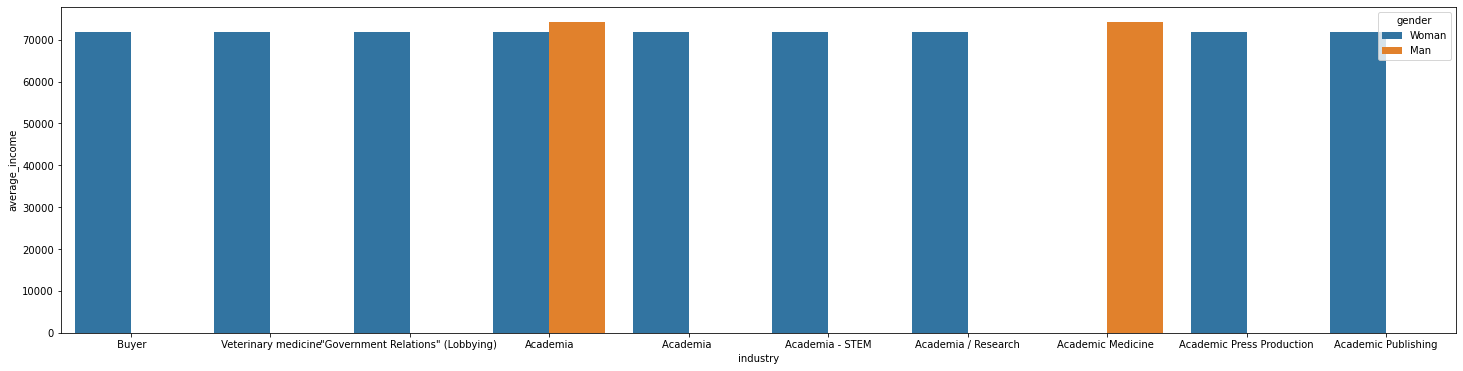

In [36]:
pivot_table = pivot_table.reset_index()

pivot_table['average_income'] = pivot_table.groupby('gender')['annual salary'].transform('mean')

# Sort the pivot table by 'industry' in ascending order
pivot_table = pivot_table.sort_values('industry')

top_10_industries = pivot_table['industry'].unique()[:10]


filtered_pivot_table = pivot_table[pivot_table['industry'].isin(top_10_industries)]
plt.figure(figsize=(25, 6))  # Set the size of the plot
# Plotting the comparison using seabornA
sns.barplot(x='industry', y='average_income', hue='gender', data=filtered_pivot_table)

22. How does the income of respondents vary based on the number of years they have worked in their current field?

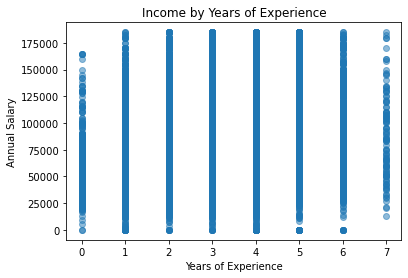

In [38]:
# create a scatter plot of income vs. years of experience
plt.scatter(salary['years of experience'], salary['annual salary'], alpha=0.5)

# add labels and title
plt.xlabel('Years of Experience')
plt.ylabel('Annual Salary')
plt.title('Income by Years of Experience')

# show the plot
plt.show()


23. What is the average income of respondents broken down by gender, country, and job title?

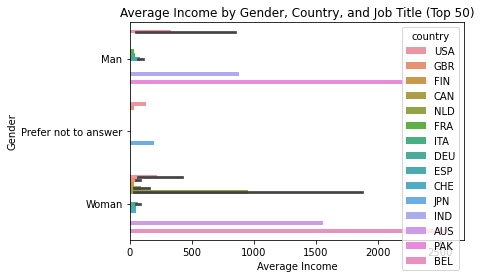

In [37]:
# Group the data by gender, country, and job title and calculate the average income for each group
avg_income_by_group = salary.groupby(['gender', 'country', 'job title'])['annual salary'].mean()

# Reset the index to convert the grouped data to a DataFrame
avg_income_by_group = avg_income_by_group.reset_index()

# Sort the average incomes in ascending order and select the top 50 combinations
top_50_combinations = avg_income_by_group.sort_values(by='annual salary').head(50)

# Create a bar plot for the average income by gender, country, and job title
sns.barplot(x='annual salary', y='gender', hue='country', data=top_50_combinations)
plt.xlabel('Average Income')
plt.ylabel('Gender')
plt.title('Average Income by Gender, Country, and Job Title (Top 50)')
plt.show()